# Use case: formula one pitstop

This example is based on the DailyMail blog entry https://www.dailymail.co.uk/sport/formulaone/article-4401632/Formula-One-pit-stop-does-crew-work.html where a nice image shows 21 people changing the 4 tires of a Formula 1 Ferrari. In this example, only 16 out 21 people are represented. This notebook can be tested online at mybinder.org
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/tpaviot/ProcessScheduler/HEAD?filepath=doc/use-case-formula-one-change-tires.ipynb)

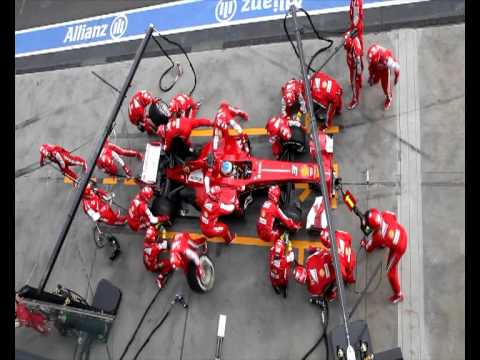

In [24]:
from IPython.display import YouTubeVideo

YouTubeVideo("aHSUp7msCIE", width=800, height=300)

### Imports

In [25]:
import processscheduler as ps

%config InlineBackend.figure_formats = ['svg']

### Create the scheduling problem
The total horizon is not knwown, leave it empty and only set the problem name.

In [26]:
change_tires_problem = ps.SchedulingProblem(name="ChangeTires")

### Create the 16 available resources
Each people in and around the car is represented as a worker.

In [27]:
nb_lifters = 2
nb_gunners = 4
nb_tyre_handlers = 8
nb_stabilizers = 2

In [28]:
# Lift tasks
lifters = [ps.Worker(name="JackOperator%i" % (i + 1)) for i in range(nb_lifters)]
gunners = [ps.Worker(name="Gunner%i" % (i + 1)) for i in range(nb_gunners)]
tyre_handlers = [ps.Worker(name="Handler%i" % (i + 1)) for i in range(nb_tyre_handlers)]
stabilizers = [ps.Worker(name="Stabilizer%i" % (i + 1)) for i in range(nb_stabilizers)]

### Create tasks and assign resources
One period is mapped to one second. For example, if lifting the rear take 2sec then the duration will be set to 2.

In [29]:
# lift tasks and lifters
# both lift tasks can be processed by any one of the lifters
lift_rear_up = ps.FixedDurationTask(name="LiftRearUp", duration=2)
lift_front_up = ps.FixedDurationTask(name="LiftFrontUp", duration=2)
lift_rear_up.add_required_resource(lifters[0])
lift_front_up.add_required_resource(lifters[1])

lift_rear_down = ps.FixedDurationTask(name="LiftRearDown", duration=2)
lift_front_down = ps.FixedDurationTask(name="LiftFrontDown", duration=2)
lift_rear_down.add_required_resource(lifters[0])
lift_front_down.add_required_resource(lifters[1])

# unscrew tasks
unscrew_front_left_tyre = ps.FixedDurationTask(name="UnScrewFrontLeftTyre", duration=2)
unscrew_front_right_tyre = ps.FixedDurationTask(
    name="UnScrewFrontRightTyre", duration=2
)
unscrew_rear_left_tyre = ps.FixedDurationTask(name="UnScrewRearLeftTyre", duration=2)
unscrew_rear_right_tyre = ps.FixedDurationTask(name="UnScrewRearRightTyre", duration=2)

gunner_unscrew_front_left_tyre = ps.SelectWorkers(
    list_of_workers=gunners, nb_workers_to_select=1
)
unscrew_front_left_tyre.add_required_resource(gunner_unscrew_front_left_tyre)

gunner_unscrew_front_right_tyre = ps.SelectWorkers(
    list_of_workers=gunners, nb_workers_to_select=1
)
unscrew_front_right_tyre.add_required_resource(gunner_unscrew_front_right_tyre)

gunner_unscrew_rear_left_tyre = ps.SelectWorkers(
    list_of_workers=gunners, nb_workers_to_select=1
)
unscrew_rear_left_tyre.add_required_resource(gunner_unscrew_rear_left_tyre)

gunner_unscrew_rear_right_tyre = ps.SelectWorkers(
    list_of_workers=gunners, nb_workers_to_select=1
)
unscrew_rear_right_tyre.add_required_resource(gunner_unscrew_rear_right_tyre)

# screw tasks and gunners
screw_front_left_tyre = ps.FixedDurationTask(name="ScrewFrontLeftTyre", duration=2)
screw_front_right_tyre = ps.FixedDurationTask(name="ScrewFrontRightTyre", duration=2)
screw_rear_left_tyre = ps.FixedDurationTask(name="ScrewRearLeftTyre", duration=2)
screw_rear_right_tyre = ps.FixedDurationTask(name="ScrewRearRightTyre", duration=2)

gunner_screw_front_left_tyre = ps.SelectWorkers(list_of_workers=gunners)
screw_front_left_tyre.add_required_resource(gunner_screw_front_left_tyre)

gunner_screw_front_right_tyre = ps.SelectWorkers(list_of_workers=gunners)
screw_front_right_tyre.add_required_resource(gunner_screw_front_right_tyre)

gunner_screw_rear_left_tyre = ps.SelectWorkers(list_of_workers=gunners)
screw_rear_left_tyre.add_required_resource(gunner_screw_rear_left_tyre)

gunner_screw_rear_right_tyre = ps.SelectWorkers(list_of_workers=gunners)
screw_rear_right_tyre.add_required_resource(gunner_screw_rear_right_tyre)

In [30]:
# tires OFF and handlers
front_left_tyre_off = ps.FixedDurationTask(name="FrontLeftTyreOff", duration=2)
front_right_tyre_off = ps.FixedDurationTask(name="FrontRightTyreOff", duration=2)
rear_left_tyre_off = ps.FixedDurationTask(name="RearLeftTyreOff", duration=2)
rear_right_tyre_off = ps.FixedDurationTask(name="RearRightTyreOff", duration=2)

for tyre_off_task in [
    front_left_tyre_off,
    front_right_tyre_off,
    rear_left_tyre_off,
    rear_right_tyre_off,
]:
    tyre_off_task.add_required_resource(ps.SelectWorkers(list_of_workers=tyre_handlers))

# tires ON and handlers, same as above
front_left_tyre_on = ps.FixedDurationTask(name="FrontLeftTyreOn", duration=2)
front_right_tyre_on = ps.FixedDurationTask(name="FrontRightTyreOn", duration=2)
rear_left_tyre_on = ps.FixedDurationTask(name="RearLeftTyreOn", duration=2)
rear_right_tyre_on = ps.FixedDurationTask(name="RearRightTyreOn", duration=2)

for tyre_on_task in [
    front_left_tyre_on,
    front_right_tyre_on,
    rear_left_tyre_on,
    rear_right_tyre_on,
]:
    tyre_on_task.add_required_resource(ps.SelectWorkers(list_of_workers=tyre_handlers))

**Stabilizers** start their job as soon as the car is stopped until the end of the whole activity.

In [31]:
stabilize_left = ps.VariableDurationTask(name="StabilizeLeft")
stabilize_right = ps.VariableDurationTask(name="StabilizeRight")

stabilize_left.add_required_resource(stabilizers[0])
stabilize_right.add_required_resource(stabilizers[1])

ps.TaskStartAt(task=stabilize_left, value=0)
ps.TaskStartAt(task=stabilize_right, value=0)

ps.TaskEndAt(task=stabilize_left, value=change_tires_problem._horizon)
ps.TaskEndAt(task=stabilize_right, value=change_tires_problem._horizon)

TaskEndAt_31695862(<class 'processscheduler.task_constraint.TaskEndAt'>)
1 assertion(s):
StabilizeRight_end == horizon

### Task precedences

In [32]:
# front left tyre operations
fr_left = [
    unscrew_front_left_tyre,
    front_left_tyre_off,
    front_left_tyre_on,
    screw_front_left_tyre,
]
for i in range(len(fr_left) - 1):
    ps.TaskPrecedence(task_before=fr_left[i], task_after=fr_left[i + 1])
# front right tyre operations
fr_right = [
    unscrew_front_right_tyre,
    front_right_tyre_off,
    front_right_tyre_on,
    screw_front_right_tyre,
]
for i in range(len(fr_right) - 1):
    ps.TaskPrecedence(task_before=fr_right[i], task_after=fr_right[i + 1])
# rear left tyre operations
re_left = [
    unscrew_rear_left_tyre,
    rear_left_tyre_off,
    rear_left_tyre_on,
    screw_rear_left_tyre,
]
for i in range(len(re_left) - 1):
    ps.TaskPrecedence(task_before=re_left[i], task_after=re_left[i + 1])
# front left tyre operations
re_right = [
    unscrew_rear_right_tyre,
    rear_right_tyre_off,
    rear_right_tyre_on,
    screw_rear_right_tyre,
]
for i in range(len(re_right) - 1):
    ps.TaskPrecedence(task_before=re_right[i], task_after=re_right[i + 1])

# all un screw operations must start after the car is lift by both front and rear jacks
for unscrew_tasks in [
    unscrew_front_left_tyre,
    unscrew_front_right_tyre,
    unscrew_rear_left_tyre,
    unscrew_rear_right_tyre,
]:
    ps.TaskPrecedence(task_before=lift_rear_up, task_after=unscrew_tasks)
    ps.TaskPrecedence(task_before=lift_front_up, task_after=unscrew_tasks)

# lift down operations must occur after each screw task is completed
for screw_task in [
    screw_front_left_tyre,
    screw_front_right_tyre,
    screw_rear_left_tyre,
    screw_rear_right_tyre,
]:
    ps.TaskPrecedence(task_before=screw_task, task_after=lift_rear_down)
    ps.TaskPrecedence(task_before=screw_task, task_after=lift_front_down)

### First solution, plot the schedule

Solver type:
	-> Standard SAT/SMT solver
Total computation time:
	ChangeTires satisfiability checked in 0.14s


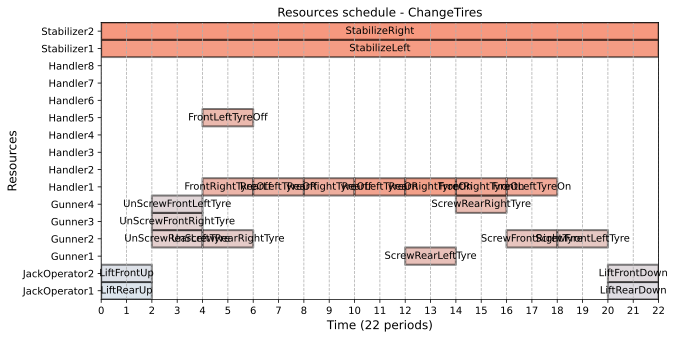

In [33]:
solver = ps.SchedulingSolver(problem=change_tires_problem)
solution_1 = solver.solve()
ps.render_gantt_matplotlib(solution_1, fig_size=(10, 5), render_mode="Resource")

### Second solution: add a makespan objective
Obviously, the former solution is not the *best* solution, not sure Ferrari will win this race ! The whole "change tires" activity must be as short as possible, so let's add a *makespan* objective, i.e. a constraint that minimizes the schedule horizon.

Solver type:
	-> Standard SAT/SMT solver
Incremental optimizer:
	Found value: 26 elapsed time:0.112s
	Checking better value < 26
	Found value: 20 elapsed time:0.211s
	Checking better value < 20
	Found value: 19 elapsed time:0.259s
	Checking better value < 19
	Found value: 18 elapsed time:0.265s
	Checking better value < 18
	Found value: 17 elapsed time:0.272s
	Checking better value < 17
	Found value: 16 elapsed time:0.278s
	Checking better value < 16
	Found value: 15 elapsed time:0.295s
	Checking better value < 15
	Found value: 14 elapsed time:0.318s
	Checking better value < 14
	Found value: 13 elapsed time:0.380s
	Checking better value < 13
	Found value: 12 elapsed time:0.388s
	Checking better value < 12
	Can't find a better solution for problem ChangeTires.

	Found optimum 12. Stopping iteration.
	total number of iterations: 11
	value: 12
	ChangeTires satisfiability checked in 0.39s


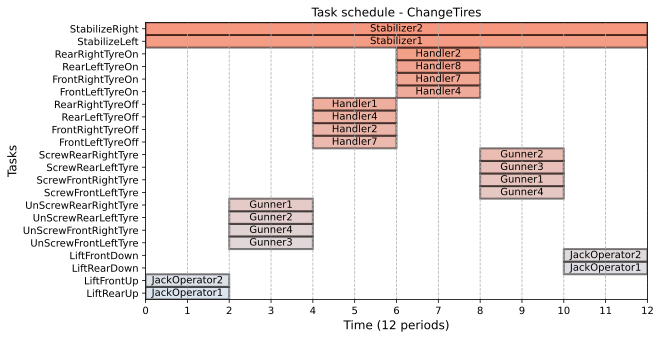

In [34]:
# add makespan objective
ps.ObjectiveMinimizeMakespan()

solver_2 = ps.SchedulingSolver(problem=change_tires_problem)
solution_2 = solver_2.solve()
ps.render_gantt_matplotlib(solution_2, fig_size=(9, 5), render_mode="Task")

### Third solution: constraint workers
This is not the best possible solution. Indeed, we can notice that the Gunner2 unscrews the RearRightTyre and screw the RearLeft tyre. We cannot imagine that a solution where gunners turn around the car is acceptable. There are two solutions to fix the schedule:
-   let the gunner be able to turn around the car, and add a "Move" task with a duration that represent the time necessary to move from one tyre to the other,
-   constraint the worker to screw the same tyre he unscrewed. Let's go this way

Solver type:
	-> Standard SAT/SMT solver
Incremental optimizer:
	Found value: 20 elapsed time:0.096s
	Checking better value < 20
	Found value: 19 elapsed time:0.196s
	Checking better value < 19
	Found value: 18 elapsed time:0.218s
	Checking better value < 18
	Found value: 17 elapsed time:0.225s
	Checking better value < 17
	Found value: 16 elapsed time:0.231s
	Checking better value < 16
	Found value: 15 elapsed time:0.249s
	Checking better value < 15
	Found value: 14 elapsed time:0.254s
	Checking better value < 14
	Found value: 13 elapsed time:0.316s
	Checking better value < 13
	Found value: 12 elapsed time:0.321s
	Checking better value < 12
	Can't find a better solution for problem ChangeTires.

	Found optimum 12. Stopping iteration.
	total number of iterations: 10
	value: 12
	ChangeTires satisfiability checked in 0.32s


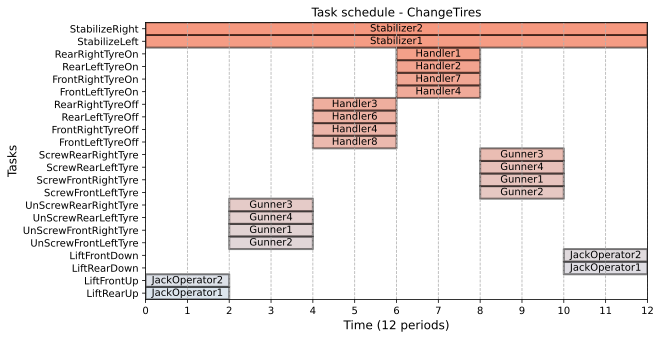

In [35]:
ps.SameWorkers(
    select_workers_1=gunner_unscrew_front_left_tyre,
    select_workers_2=gunner_screw_front_left_tyre,
)
ps.SameWorkers(
    select_workers_1=gunner_unscrew_front_right_tyre,
    select_workers_2=gunner_screw_front_right_tyre,
)
ps.SameWorkers(
    select_workers_1=gunner_unscrew_rear_left_tyre,
    select_workers_2=gunner_screw_rear_left_tyre,
)
ps.SameWorkers(
    select_workers_1=gunner_unscrew_rear_right_tyre,
    select_workers_2=gunner_screw_rear_right_tyre,
)

solver_3 = ps.SchedulingSolver(problem=change_tires_problem)
solution_3 = solver_3.solve()
ps.render_gantt_matplotlib(solution_3, fig_size=(9, 5), render_mode="Task")

This is much better !